<h2>Podstawy Uczenia Maszynowego Laboratorium 1</h2>

Anna Alberska, Klaudia Knafel

<h3><b>0. Instalacja pakietów</b></h3>

`pip install scikit-learn`

`pip install numpy`

`pip install matplotlib`

`pip install nltk`


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import nltk

<h3><b>1. Przygotowanie zbioru danych</b></h3>

Dostępne zbiory danych: https://archive.ics.uci.edu/ml/datasets.html


- MNIST:
  - Ściągnięcie z internetu: http://yann.lecun.com/exdb/mnist/ , https://www.openml.org/d/554
  - Załadowanie/Ściągnięcie z pomocą frameworka np.:

In [39]:
# Ściągnięcie mnista z openml
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("Ilość danych: " + str(len(X)))

Ilość danych: 70000


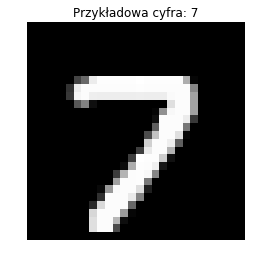

In [40]:
def display_random_MNIST_data(X, y):
    rand_index = np.random.randint(len(X))
    image = np.reshape(X[rand_index], (28, 28))
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Przykładowa cyfra: ' + y[rand_index])
    plt.show()

display_random_MNIST_data(X, y)

<b>Zbiory treningowy, testowy, walidujący</b>

- Treningowy - do trenowania modelu
- Testowy - dane, których model nie zna(nie pojawiły się podczas trenowania) służące do testowania modelu
- Walidujący - (opcjonalny)dodatkowy zbiór, służący do dostosowywania hyperparametrów

Więcej na: https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets

Scikit-learn docs: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split 

Ilość danych treningowych: 5000
Ilość danych treningowych: 2000

Losowa cyfra z danych treningowych: 


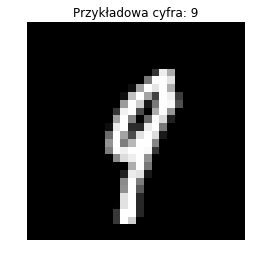

Losowa cyfra z danych testowych: 


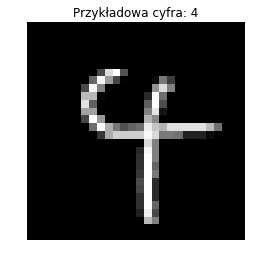

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000, test_size=2000)
print("Ilość danych treningowych: " + str(len(X_train)))
print("Ilość danych treningowych: " + str(len(X_test)))
print()

print("Losowa cyfra z danych treningowych: ")
display_random_MNIST_data(X_train, y_train)

print("Losowa cyfra z danych testowych: ")
display_random_MNIST_data(X_train, y_train)

 - zbiór tekstowy
 
 
Wykorzystany zbiór tekstowy dostępny w pakiecie scikit-learn. 
 Zbiór danych z <b>20 newsgroups</b>.
 
Szczegóły:
- Classes	20
- Samples total	18846
- Dimensionality	1
- Features	text

In [42]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'sci.space'] # Jeśli dostępne wszystkie kategorie: categories="all"
twenty_news = fetch_20newsgroups(subset='train', shuffle=True, categories=categories)

def display_random_newsgroup_data(data):
    rand_index = np.random.randint(len(data.data))
    print(data.data[rand_index])
    print("Newsgroup: " + data.target_names[data.target[rand_index]])
    
display_random_newsgroup_data(twenty_news)

From: joachim@kih.no (joachim lous)
Subject: Re: XV for MS-DOS !!!
Organization: Kongsberg Ingeniorhogskole
Lines: 20
NNTP-Posting-Host: samson.kih.no
X-Newsreader: TIN [version 1.1 PL8]

NOE-MAILADDRESS@eicn.etna.ch wrote:
> I'm sorry for...

>     1)  The late of the answer but I couldn't find xv221 for msdos 'cause 
> 	I forgot the address...but I've retrieve it..

>     2)  Posting this answer here in comp.graphics 'cause I can't use e-mail,
>    ^^^  not yet....

>    2) My bad english 'cause I'm a Swiss and my language is french....
    ^^^
If french is your language, try counting in french in stead, maybe
it will work better.... :-)

    _______________________________
   / _ L*   /  _  / .    /      _  /_  "One thing is for sure: The sheep
  /  _)    /()(/(/)//)) /_ ()(/_) / /  Is NOT a creature of the earth."
 / \_)~  (/ Joachim@kih.no       / /     
/_______________________________/ / -The back-masking on 'Haaden II'
 /_______________________________/  from 'Exposure' by Robe

Podstawowe pojęcia przy przetwarzaniu zbioru tekstowego:
- <b>Stopwords</b>: najpopularniejsze słowa w danym języku, nie mające wpływu na znaczenie danego zdania np.: the, a, an, him, her w języku angielskim.
- <b>Tokenization</b>: rozbijanie tekstu na kolekcję tokenów, najczęściej słów.
- <b>Stemming</b>: redukowanie danego słowa do jego formy źródłowej np.: looking -> look

Scikit-learn wykorzystuje do przetwarzania tekstu klasy o nazwie Vectorizer. 
Dostępne Vectorizers:
- [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): konwertuje kolekcję dokumentów na macierz zliczonych tokenów
- [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html#sklearn.feature_extraction.text.HashingVectorizer): konwertuje kolekcję dokumentów na macierz wystąpień tokenów
- [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer): konwertuje obliczoną macierz na znormalizowaną tf lub tf-idf reprezentację (o tf-idf więcej niżej)
- [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer): konwertuje kolekcję dokumentów na macierz cech tf-idf.

In [43]:
# Przykładowe wykorzystanie CountVectorizer(usunięcie znaków interpunkcyjnych + tokenizacja)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
transform = vectorizer.fit_transform(twenty_news.data)
counts = transform.toarray()

print("Ilość tokenów: " + str(len(vectorizer.get_feature_names())))
print()

# Konwersja przykładowego dokumentu
print("Przed konwersją:")
print(twenty_news.data[0])
print()
print("Po konwersji:")
print(counts[0])

Ilość tokenów: 23882

Przed konwersją:
From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: thining algorithm
Organization: Purdue University
Lines: 15

In article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  
(Kevin Shin) writes:
> I am trying obtain program to preprocess handwriting characters.
> Like thining algorithm, graph alogrithm.
> Do anyone know where I can obtain those?

I usually use "Algorithms for graphics and image processing" by
Theodosios Pavlidis, but other people here got them same idea and now
3 of 4 copies in the libraries have been stolen!

Another reference is "Digital Image Processing" by Gonzalez and
Wintz/Wood, which is widely available but a little expensive ($55
here- I just checked today).

ab


Po konwersji:
[0 0 0 ... 0 0 0]


In [44]:
"is" in vectorizer.get_feature_names()

True

Do stemmingu wykorzystana klasa <b>SnowballStemmer</b> dostępna w <b>NLTK</b> (http://www.nltk.org/).

Inne klasy dostępne w NLTK służące do stemmingu np.:
- PorterStemmer
- LancasterStemmer
- itd.

Dany stemmer różni się od innych pod względem przetwarzania danej rodziny słów.

In [45]:
# Wykorzystanie CountVectorizer: usunięcie znaków interpunkcyjnych, usunięcie stopwords, stemming, tokenizacja
from sklearn.feature_extraction import stop_words

print("Zbiór stop words dostępny w scikit-learn: ")
print(stop_words.ENGLISH_STOP_WORDS)

Zbiór stop words dostępny w scikit-learn: 
frozenset({'whoever', 'up', 'once', 'us', 'anyway', 'when', 'least', 'off', 'seemed', 'someone', 'always', 'de', 'too', 'twenty', 'will', 'if', 'well', 'anyhow', 'noone', 'himself', 'find', 'already', 'top', 'becoming', 'still', 'here', 'for', 'who', 'throughout', 'neither', 'while', 'ourselves', 'fill', 'very', 'both', 'thereafter', 'therefore', 'him', 'become', 'before', 'he', 'should', 'what', 'other', 'sincere', 'which', 'as', 'eg', 'any', 'first', 'hers', 'each', 'formerly', 'fifty', 'herself', 'interest', 'ours', 'otherwise', 'out', 'everyone', 'together', 'nor', 'being', 'anything', 'none', 'not', 'others', 'so', 'four', 'whose', 'ltd', 'same', 'sometimes', 'whereupon', 'this', 'an', 'side', 'would', 'eleven', 'thereby', 'show', 'his', 'seems', 'myself', 'after', 'upon', 'a', 'beyond', 'that', 'since', 'themselves', 'some', 'could', 'onto', 'describe', 'them', 'from', 'because', 'eight', 'cry', 'beforehand', 'somewhere', 'cant', 'althou

In [46]:
analyzer = CountVectorizer( stop_words=stop_words.ENGLISH_STOP_WORDS).build_analyzer()
stemmer = nltk.stem.SnowballStemmer('english')

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
stem_transform = stem_vectorizer.fit_transform(twenty_news.data)
stem_counts = stem_transform.toarray()

print("Ilość tokenów: " + str(len(stem_vectorizer.get_feature_names())))
print()

# Konwersja przykładowego dokumentu
print("Przed konwersją:")
print(twenty_news.data[0])
print()
print("Po konwersji:")
print(stem_counts[0])

Ilość tokenów: 18642

Przed konwersją:
From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: thining algorithm
Organization: Purdue University
Lines: 15

In article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  
(Kevin Shin) writes:
> I am trying obtain program to preprocess handwriting characters.
> Like thining algorithm, graph alogrithm.
> Do anyone know where I can obtain those?

I usually use "Algorithms for graphics and image processing" by
Theodosios Pavlidis, but other people here got them same idea and now
3 of 4 copies in the libraries have been stolen!

Another reference is "Digital Image Processing" by Gonzalez and
Wintz/Wood, which is widely available but a little expensive ($55
here- I just checked today).

ab


Po konwersji:
[0 0 0 ... 0 0 0]


In [47]:
"is" in stem_vectorizer.get_feature_names()

False

<b>Przetworzenie mniejszego zbioru tekstowego</b>

Zbiór tekstowy dostępny pod linkiem: 
http://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review

In [48]:
# Zaimportowanie datasetu zawierającego opinie
# Target:0 - keyboard, 1 - price

with open("keyboard_netbook_1005ha.txt.data", "r") as f:
    keyboard_data = f.readlines()
    
keyboard_data = [s.split("\n")[0] for s in keyboard_data]
keyboard_target = [0] * len(keyboard_data) 

with open("price_holiday_inn_london.txt.data", "r") as f:
    price_holiday_data = f.readlines()
    
price_holiday_data = [s.split("\n")[0] for s in price_holiday_data]
price_holiday_target = [1] * len(price_holiday_data) 

data = keyboard_data + price_holiday_data
target = keyboard_target + price_holiday_target

print(data[np.random.randint(len(data))])

All in all I would definitly recommend this hotel to anyone wanting a pleasant stay in London, in a nice area, at a good price !


In [49]:
# Przetworzenie zbioru za pomocą CountVectorizer

opinion_analyzer = CountVectorizer( stop_words=stop_words.ENGLISH_STOP_WORDS).build_analyzer()

stemmer = nltk.stem.SnowballStemmer('english')

def opinion_stemmed_words(doc):
    return (stemmer.stem(w) for w in opinion_analyzer(doc))

opinion_vectorizer = CountVectorizer(analyzer=opinion_stemmed_words)
opinion_transform = opinion_vectorizer.fit_transform(data)
opinion_counts = opinion_transform.toarray()

print("Ilość tokenów: " + str(len(opinion_vectorizer.get_feature_names())))
print()

# Konwersja przykładowego dokumentu
print("Przed konwersją:")
print(data[0])
print()
print("Po konwersji:")
print(opinion_counts[0])

Ilość tokenów: 739

Przed konwersją:
,  I think the new keyboard rivals the great hp mini keyboards .

Po konwersji:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

In [50]:
opinion_vectorizer.get_feature_names()

['00',
 '10',
 '100',
 '1005ha',
 '120',
 '15',
 '16th',
 '17',
 '17th',
 '20',
 '210',
 '250',
 '2g',
 '2the',
 '35',
 '3x',
 '47',
 '75',
 '76',
 '79',
 '8g',
 '90',
 '900',
 '92',
 'abl',
 'access',
 'acclim',
 'accommod',
 'accomod',
 'actual',
 'adapt',
 'adjust',
 'adult',
 'advanc',
 'advic',
 'affect',
 'afford',
 'afraid',
 'airlin',
 'amaz',
 'american',
 'angst',
 'anniversari',
 'anth',
 'appal',
 'appar',
 'area',
 'arrang',
 'arriv',
 'ask',
 'aspect',
 'asus',
 'ate',
 'attach',
 'attract',
 'authent',
 'auto',
 'avail',
 'averag',
 'aw',
 'away',
 'awesom',
 'backspac',
 'bad',
 'bag',
 'bar',
 'bargain',
 'base',
 'basic',
 'bathroom',
 'batteri',
 'beat',
 'bed',
 'believ',
 'benefit',
 'best',
 'better',
 'beverag',
 'bid',
 'big',
 'biggest',
 'bit',
 'block',
 'blue',
 'board',
 'boni',
 'bonus',
 'book',
 'boot',
 'bottl',
 'bought',
 'box',
 'boyfriend',
 'breakfast',
 'breez',
 'brief',
 'briefli',
 'bright',
 'budget',
 'buffet',
 'build',
 'button',
 'buy',
 '

<h3><b>2. Tf-idf(term frequency–inverse document frequency)</b></h3>

Metoda wyliczania częstości wystąpienia danego słowa, uwzględniające wyważenie wystąpięnia względem innych słów w dokumencie oraz znaczenie słowa w kontekście całego dokumentu. (Więcej na: https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

Wzór: 
$$(tf,idf)_{i, j} = tf_{i, j} \times idf_i$$
gdzie 
(term frequency)
<br> $$tf_{i, j} = \frac{f_{i, j}}{\Sigma_{k}{f_{k, j}}}$$ <br>
a idf (inverse document frequency) zależne od wybranego wariantu.
Najczęściej wzór wygląda następująco:

<br> $$tf_{i, j} = \log{\frac{ilość słów w dokumencie}{ilość dokumentów}}$$<br>

W scikit-learn występują [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) oraz [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) służące do konwersji dokumentu tekstowego na macierz reprezentacji tf-idf.

In [51]:
# Obliczenie macierzy reprezentacji tf-idf na zbiorze tekstowym opinii
from sklearn.feature_extraction.text import TfidfTransformer

tdidf_transformer = TfidfTransformer()
tdidf = tdidf_transformer.fit_transform(opinion_counts).toarray()

In [52]:
# Rozkład słów w wybranym dokumencie
doc_index = 1

print("Dokument: ")
print(data[doc_index])

# print()
# print("Rozkład słów w dokumencie: ")
# print(tdidf[doc_index])

print()
print("Wartości td-idf dla słów z dokumentu: ")
print()
for i, value in enumerate(tdidf[doc_index]):
    if value != 0:
        print("Słowo: " + opinion_vectorizer.get_feature_names()[i] + "; Td-idf: " + str(value))

Dokument: 
Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .

Wartości td-idf dla słów z dokumentu: 

Słowo: batteri; Td-idf: 0.33033328573263965
Słowo: better; Td-idf: 0.3113680795635933
Słowo: differ; Td-idf: 0.3923382984289956
Słowo: keyboard; Td-idf: 0.13795464537735674
Słowo: life; Td-idf: 0.33033328573263965
Słowo: minimum; Td-idf: 0.46439624514809497
Słowo: reason; Td-idf: 0.33033328573263965
Słowo: upgrad; Td-idf: 0.4325100957632241


<h3><b>3. Macierz odległości</b></h3>

Metryka Minkowskiego: $$d_{p} = (\sum\limits_{i=1}^n |{x_i - y_i}|^p)^{\frac{1}{p}}$$

Metryka cosinusowa: $$similarity = cos(\theta) = \frac{x \circ y}{||x|| ||y||}$$

Metryki odległości dostępne są w scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [53]:
def display_example_metric_data(data, metric, index_a, index_b):
    print("Sentence A: " + data[index_a])
    print("Sentence B: " + data[index_b])
    print("Metric: " + str(metric[index_a][index_b]))
    
def display_closest_metric_data(data, metric, index, if_cos=False):
    closest_i = -1
    if if_cos:
        closest_v = float("-inf")
    else:
        closest_v = float("inf")
    for i, m_v in enumerate(metric[index]):
        if if_cos:
            if int(m_v) != 1 and m_v > closest_v:
                closest_i = i
                closest_v = m_v
        else:
            if m_v != 0 and m_v < closest_v:
                closest_i = i
                closest_v = m_v
            
    print("Sentence A: " + data[index])
    print("Closest Sentence B: " + data[closest_i])
    print("Closest Metric: " + str(metric[index][closest_i]))
    
def display_furthest_metric_data(data, metric, index, if_cos=False):
    furthest_i = -1
    if if_cos:
        furthest_v = float("inf")
    else:
        furthest_v = float("-inf")
    for i, m_v in enumerate(metric[index]):
        if if_cos:
            if int(m_v) != 1 and m_v < furthest_v:
                furthest_i = i
                furthest_v = m_v
        else:
            if m_v != 0 and m_v > furthest_v:
                furthest_i = i
                furthest_v = m_v
            
    print("Sentence A: " + data[index])
    print("Furthest Sentence B: " + data[furthest_i])
    print("Furthest Metric: " + str(metric[index][furthest_i]))

<b>Metryka Minkowskiego</b>

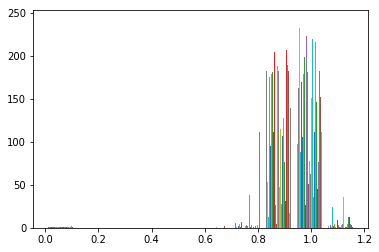

In [54]:
from sklearn.neighbors import DistanceMetric as metric

dist = metric.get_metric("minkowski", p=3)
minsky = dist.pairwise(tdidf)

# Histogram
plt.hist(minsky)
plt.show()

In [55]:
minsky[5]

array([0.93508392, 0.93422017, 0.98371101, 0.92347066, 0.95929344,
       0.        , 0.93022286, 0.92518286, 0.87859599, 0.92765682,
       0.89496509, 0.92398659, 0.95107384, 1.01682142, 0.97640938,
       0.99424015, 0.89240124, 0.95726729, 0.97760211, 0.94197042,
       0.92677524, 0.94438652, 0.89256177, 0.95389923, 0.94277325,
       0.95935847, 0.97794739, 0.95026405, 0.99443184, 0.99600136,
       1.02965304, 0.97280958, 0.92598858, 0.98166804, 0.95950412,
       1.00756128, 0.94920598, 0.89140746, 0.92346357, 0.88272074,
       0.95565655, 0.93306964, 0.90609421, 0.93838532, 0.94280747,
       1.03953847, 0.9038364 , 0.91091098, 0.9167503 , 0.99864041,
       0.95933873, 0.90939297, 0.96112337, 0.97346669, 0.94819963,
       0.98125627, 1.0232514 , 0.91724875, 0.86358022, 0.93887492,
       0.93280153, 0.92615499, 0.97364574, 0.90423756, 0.97447908,
       1.04152012, 0.84011146, 0.90139299, 0.91727879, 0.91389227,
       0.99639359, 0.87946272, 0.87123136, 0.95135864, 0.94814

In [56]:
display_closest_metric_data(data, minsky, 5)
print()
display_furthest_metric_data(data, minsky, 5)

Sentence A:  At home I now have my Asus connected to my desktop's keyboard and monitor .
Closest Sentence B:  It is a bit of a pain to unplug and replug power, monitor, LAN, wireless mouse keyboard, hard drive back, up and PDA cable, but not the end of the world .
Closest Metric: 0.8401114620463245

Sentence A:  At home I now have my Asus connected to my desktop's keyboard and monitor .
Furthest Sentence B: Excellent hotel excellent price .
Furthest Metric: 1.096729026710121


<b>Metryka cosinusowa</b>

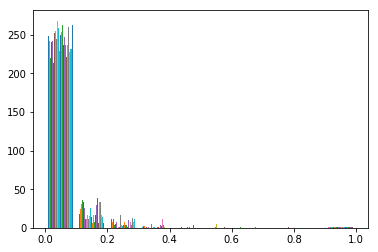

In [57]:
cos = sklearn.metrics.pairwise.cosine_similarity(tdidf)

# Histogram
plt.hist(cos)
plt.show()

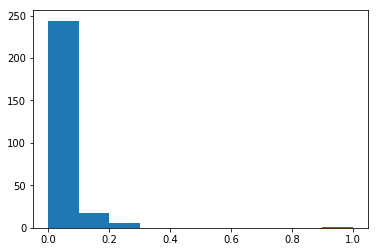

In [58]:
plt.hist(cos[1])
plt.show()

In [59]:
cos[1]

array([0.03726106, 1.        , 0.02505403, 0.01755142, 0.02283806,
       0.01993177, 0.018157  , 0.01442398, 0.18813098, 0.21183189,
       0.01466381, 0.01765579, 0.01913961, 0.04362922, 0.02430726,
       0.01784952, 0.01208419, 0.02374094, 0.02592771, 0.01795738,
       0.03624685, 0.02243594, 0.02816244, 0.02101848, 0.02098838,
       0.02236503, 0.02196021, 0.02150766, 0.02761842, 0.02550872,
       0.0326405 , 0.02267299, 0.01759878, 0.02402789, 0.02161539,
       0.03024873, 0.02114538, 0.01206551, 0.01652618, 0.01682534,
       0.02476158, 0.23122232, 0.18380437, 0.02035787, 0.0114176 ,
       0.03337233, 0.21384005, 0.01408034, 0.09730889, 0.02727986,
       0.02149075, 0.01350885, 0.0212617 , 0.23072476, 0.01999935,
       0.02951316, 0.03750134, 0.01765043, 0.01445645, 0.01212578,
       0.01663568, 0.01031404, 0.0262558 , 0.01421829, 0.02588246,
       0.03378783, 0.01116569, 0.01361312, 0.01396983, 0.25976775,
       0.02838327, 0.04595325, 0.01919188, 0.02086365, 0.01950

In [60]:
display_closest_metric_data(data, cos, 1, True)
print()
display_furthest_metric_data(data, cos, 1, True)

Sentence A: Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .
Closest Sentence B:  Great battery life, decent sized screen, and the keyboard was large enough to be comfortable to type on .
Closest Metric: 0.2597677455264713

Sentence A: Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .
Furthest Sentence B: Great Price Terrific Location .
Furthest Metric: 0.0


<h3><b>4. K-NN</b></h3>

<br> K-NN(k-nearest neighbors algorithm) - algorytm wykorzystywany do klasyfikacji i regresji polegający na przydzieleniu punktu do danej klasy, bazując na k najbliższych sąsiadach tego punktu. <br> 
(Więcej na: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

Do wizualizacji danych została wykorzystana metoda PCA(principal component analysis) w celu zmniejszenia rozmiaru zbioru danych. Więcej na jej temat na innych laboratoriach.

Scikit-learn i KNN: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

<b>Algorytm KNN dla zbioru tekstowego</b>

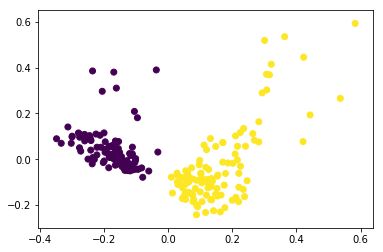

In [61]:
from sklearn.decomposition import PCA
# target: 0 - keyboard; 1 - price holiday

with open("keyboard_netbook_1005ha.txt.data", "r") as f:
    keyboard_data = f.readlines()
    
keyboard_data = [s.split("\n")[0] for s in keyboard_data]
keyboard_target = [0] * len(keyboard_data)
X_keyboard_train, X_keyboard_test, y_keyboard_train, y_keyboard_test = train_test_split(keyboard_data, keyboard_target, test_size=0.2)

with open("price_holiday_inn_london.txt.data", "r") as f:
    price_holiday_data = f.readlines()
    
price_holiday_data = [s.split("\n")[0] for s in price_holiday_data]
price_holiday_target = [1] * len(price_holiday_data) 
X_price_holiday_train, X_price_holiday_test, y_price_holiday_train, y_price_holiday_test = train_test_split(price_holiday_data, price_holiday_target, test_size=0.2)

X_train = X_keyboard_train + X_price_holiday_train
y_train = y_keyboard_train + y_price_holiday_train

X_test = X_keyboard_test + X_price_holiday_test
y_test = y_keyboard_test + y_price_holiday_test

opinion_analyzer = CountVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS).build_analyzer()

stemmer = nltk.stem.SnowballStemmer('english')

def opinion_stemmed_words(doc):
    return (stemmer.stem(w) for w in opinion_analyzer(doc))

opinion_vectorizer = CountVectorizer(analyzer=opinion_stemmed_words)
tdidf_transformer = TfidfTransformer()
X_train = tdidf_transformer.fit_transform(opinion_vectorizer.fit_transform(X_train).toarray()).toarray()
X_train_pca = PCA(n_components=2).fit(X_train)
X_train_data2D = X_train_pca.transform(X_train)

X_test = tdidf_transformer.fit_transform(opinion_vectorizer.fit_transform(X_test).toarray()).toarray()
X_test_pca = PCA(n_components=2).fit(X_test)
X_test_data2D = X_test_pca.transform(X_test)

plt.scatter(X_train_data2D[:, 0], X_train_data2D[:, 1], c=y_train)
plt.show()

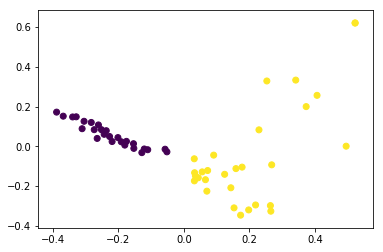

In [62]:
plt.scatter(X_test_data2D[:, 0], X_test_data2D[:, 1], c=y_test)
plt.show()

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric="cosine")  
classifier.fit(X_train_data2D, y_train)

y_pred = classifier.predict(X_test_data2D)

In [64]:
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [65]:
cor = len([i for p, t in zip(y_pred, y_test) if p == t])
accuracy = cor / len(y_pred)
print(accuracy)

1.0


<b>Algorytm KNN dla zbioru MNIST</b>

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - normalizuje dane i skaluje je do wartości unarnych.

In [66]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

In [67]:
# metryka euklidesowa
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, train_size=5000, test_size=2000)

scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_test = scaler.transform(X_mnist_test)

classifier = KNeighborsClassifier(n_neighbors=15, metric="minkowski", p=2)  
classifier.fit(X_mnist_train, y_mnist_train)

y_mnist_pred = classifier.predict(X_mnist_test)

In [68]:
print(y_mnist_pred)
print(y_mnist_test)

['9' '1' '8' ... '7' '3' '7']
['9' '1' '8' ... '7' '3' '7']


In [69]:
mnist_minki_cor = len([i for p, t in zip(y_mnist_pred, y_mnist_test) if p == t])
mnist_minki_accuracy = mnist_minki_cor / len(y_mnist_pred)
print(mnist_minki_accuracy)

0.8875


In [70]:
# metryka cosinusowa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, train_size=5000, test_size=2000)

scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_test = scaler.transform(X_mnist_test)

classifier = KNeighborsClassifier(n_neighbors=15, metric="cosine")  
classifier.fit(X_mnist_train, y_mnist_train)

y_mnist_pred = classifier.predict(X_mnist_test)

mnist_cos_cor = len([i for p, t in zip(y_mnist_pred, y_mnist_test) if p == t])
mnist_cos_accuracy = mnist_cos_cor / len(y_mnist_pred)
print(mnist_cos_accuracy)

0.8925


<b>Trick kernelowy</b>

![kernel_trick](0_ngkO1BblQXnOTcmr.png)

<b>Rozwiązanie problemu klasyfikacji:</b> dane nie są rozdzielne liniowo w przestrzeni o danym wymiarze, ale mogą być w przestrzeni o wyższym wymiarze.  Nie są liczone współrzędne punktów w wyższym wymiarze, jedynie iloczyny skalarne pomiędzy parami.

<h3><b>5. Normalizacja KNN </b></h3>

Normalizacja sprawia, że cecha/zmienna uzyskuje odcyhlenie standardowe równe 1. Jest ona potrzebna, gdy wartości danych dużo się różnią lub gdy wartości dla jednej cechy mają dużo większy zasięg, niż pozostałych, ponieważ wtedy bez skalowania wartości tej cechy wartości pozostałych zostałyby zdominowane. Więcej na: https://en.wikipedia.org/wiki/Feature_scaling#Standardization



<h3><b>Zadanie</b></h3>
1. Dokonać normalizacji wybranego zbioru np. https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)
2. Zaimplementować KNN dla tego zbioru(można skorzystać z metody dostępnej w scikit-learnie).
2. Wygenerować losowo dodatkowe wymiary i przedstawić wykresy odległości dla różnych wartości p(dla metryki Minkowskiego) oraz różnej ilości dogenerowanych wymiarów np. dogenerowane wymiary: 2, 10, 100.

<h3><b>Zadania pomocnicze</b></h3>
1. Obliczyć tf-idf dla zbioru 20newsgroups.
2. Zaimplementowanie KNN dla drugiego zbioru tekstowego lub Znalezienie zbioru tekstowego w internecie i zaimplementowanie dla niego KNN.